In [54]:
import numpy as np
import matplotlib.pyplot as plt

import dickandballs as db
import helpers as hel

# chiral eft

In [55]:
ceft_lower= np.loadtxt('EOS/ceft/eos_ceft_lower.dat')
n_ceft_lower, p_ceft_lower, e_ceft_lower = ceft_lower.T

ceft_upper= np.loadtxt('EOS/ceft/eos_ceft_upper.dat')
n_ceft_upper, p_ceft_upper, e_ceft_upper = ceft_upper.T

n_ceft = n_ceft_lower # fm^-3

e_ceft = (e_ceft_lower+e_ceft_upper)/2
p_ceft = (p_ceft_lower+p_ceft_upper)/2


excluding the crust (n=0.076 fm^-3) because the uncertainty in the crust is way to low and that strongly influences how the gpr behaves (it conditions on the crust too heavily):

In [3]:
np.where(n_ceft<=0.076)[0][-1]

428

In [4]:
n_ceft[428]

0.0758

In [56]:
n_crust = n_ceft[:428]
e_crust = e_ceft[:428]
p_crust = p_ceft[:428]


p_ceft_upper = p_ceft_upper[427:]
p_ceft_lower = p_ceft_lower[427:]

e_ceft_upper = e_ceft_upper[427:]
e_ceft_lower = e_ceft_lower[427:]

n_ceft = n_ceft[427:]
e_ceft = e_ceft[427:]
p_ceft = p_ceft[427:]
mu_ceft = (e_ceft + p_ceft)/n_ceft

e_ini = e_ceft[0]
p_ini = p_ceft[0]
n_ini = n_ceft[0]
mu_ini = (e_ini + p_ini) / n_ini


# unused due to no uncertainty calculations
e_crust_width = e_ceft_upper[0] - e_ceft_lower[0]
e_ini_sigma = hel.CI_to_sigma(e_crust_width, 75)

p_crust_width = p_ceft_upper[0] - p_ceft_lower[0]
p_ini_sigma = hel.CI_to_sigma(p_crust_width, 75)

mu_ini_sigma = e_ini_sigma + p_ini_sigma

In [12]:
print("Does the crust eos overlap with the inner eos?", n_crust[-1]==n_ceft[0])

Does the crust eos overlap with the inner eos? True


In [13]:
print(mu_ini)
(e_crust[-1] + p_crust[-1])/ n_crust[-1] == mu_ini

953.2261126378412


True

In [57]:
cs2_ceft_lower = np.gradient(p_ceft_lower, e_ceft_lower) #dp/de
cs2_ceft_upper = np.gradient(p_ceft_upper, e_ceft_upper) #dp/de
cs2_ceft_avg = (cs2_ceft_upper+cs2_ceft_lower)/2
cs2_ceft_width = cs2_ceft_upper-cs2_ceft_lower
cs2_ceft_sigma = hel.CI_to_sigma(cs2_ceft_width, 75)

phi_ceft_lower = hel.get_phi(cs2_ceft_lower)
phi_ceft_upper = hel.get_phi(cs2_ceft_upper)
phi_ceft_width = phi_ceft_upper-phi_ceft_lower
phi_ceft_avg = (phi_ceft_upper+phi_ceft_lower)/2
phi_ceft_sigma = hel.CI_to_sigma(phi_ceft_width, 75)


In [15]:
cs2_ceft_lower.shape == n_ceft.shape

True

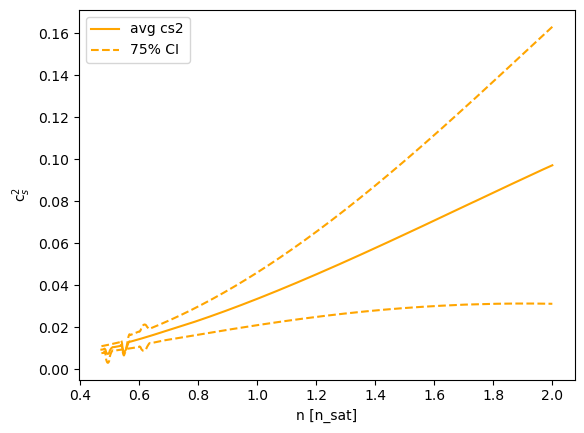

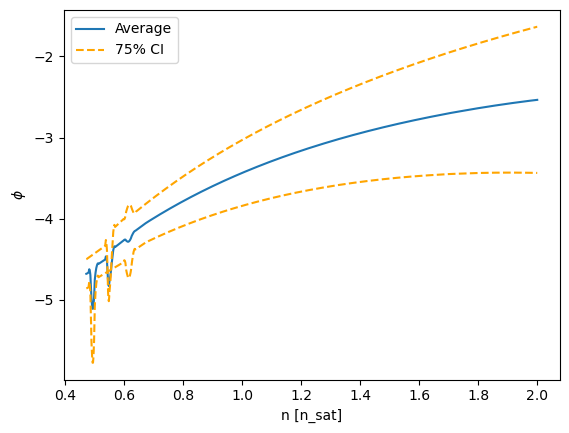

In [11]:
plt.plot(n_ceft/0.16, cs2_ceft_avg, color='orange', label='avg cs2')

plt.plot(n_ceft/0.16, cs2_ceft_avg+cs2_ceft_width/2, '--', color='orange', label='75% CI')
plt.plot(n_ceft/0.16, cs2_ceft_avg-cs2_ceft_width/2, '--', color='orange')


plt.ylabel(r'c$_s^2$')
plt.xlabel('n [n_sat]')
plt.legend()
plt.show()

plt.plot(n_ceft/0.16, phi_ceft_avg, label='Average')
plt.plot(n_ceft/0.16, phi_ceft_lower, "--", color='orange')
plt.plot(n_ceft/0.16, phi_ceft_upper, "--", color='orange', label='75% CI')
plt.ylabel(r'$\phi$')
plt.xlabel('n [n_sat]')
plt.legend()
plt.show()


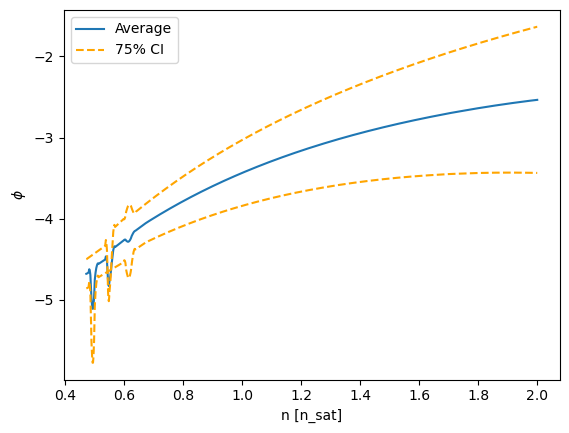

In [7]:
phi_ceft_lower = hel.get_phi(cs2_ceft_lower)
phi_ceft_upper = hel.get_phi(cs2_ceft_upper)
phi_ceft_width = phi_ceft_upper-phi_ceft_lower
phi_ceft_avg = (phi_ceft_upper+phi_ceft_lower)/2
phi_ceft_sigma = hel.CI_to_sigma(phi_ceft_width, 75)

plt.plot(n_ceft/0.16, phi_ceft_avg, label='Average')
plt.plot(n_ceft/0.16, phi_ceft_lower, "--", color='orange')
plt.plot(n_ceft/0.16, phi_ceft_upper, "--", color='orange', label='75% CI')
plt.ylabel(r'$\phi$')
plt.xlabel('n [n_sat]')
plt.legend()
plt.show()


# GPR

all my number density is in fm^-3

but the x_train and x_test going into the gpr will be in nsat

In [53]:
cs2_pqcd

array([0.35022088, 0.34894435, 0.34771003, 0.34651636, 0.34536186,
       0.34424512, 0.34316476, 0.34211949, 0.34110806, 0.34012927,
       0.33918197, 0.33826505, 0.33737746, 0.33651818, 0.33568623,
       0.33488068, 0.33410062, 0.3333452 , 0.33261357, 0.33190494,
       0.33121855, 0.33055365, 0.32990952, 0.3292855 , 0.32868091,
       0.32809513, 0.32752754, 0.32697756, 0.32644461, 0.32592816,
       0.32542769, 0.32494267, 0.32447263, 0.32401709, 0.3235756 ,
       0.32314772, 0.32273303, 0.32233112, 0.32194159, 0.32156408,
       0.3211982 , 0.32084361, 0.32049997, 0.32016694, 0.3198442 ,
       0.31953145, 0.31922839, 0.31893472, 0.31865018, 0.31837449,
       0.31810738, 0.31784862, 0.31759795, 0.31735514, 0.31711996,
       0.31689219, 0.31667161, 0.31645803, 0.31625123, 0.31605102,
       0.31585722, 0.31566964, 0.31548811, 0.31531245, 0.3151425 ,
       0.31497811, 0.3148191 , 0.31466534, 0.31451668, 0.31437297,
       0.31423407, 0.31409986, 0.3139702 , 0.31384497, 0.31372

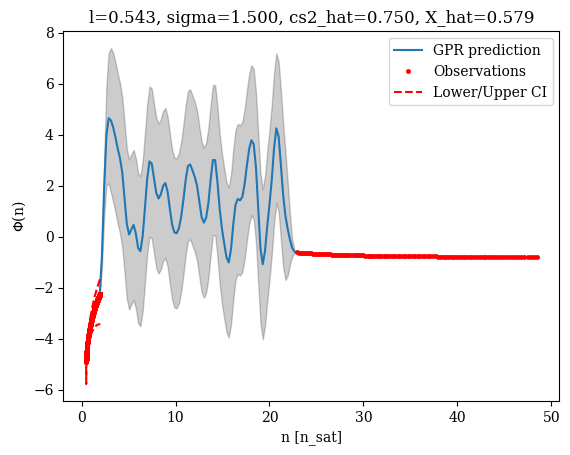

In [52]:
cs2_hat, nu_hat, l_hat, X_hat = hel.get_hype_samples()

kernel = db.Kernel('SE', sigma=nu_hat, l=l_hat)

n_pqcd, cs2_pqcd = hel.get_pqcd(X_hat, size=100)

x_train =  np.concatenate((n_ceft/0.16, n_pqcd)) #nsat
cs2_train =  np.concatenate((cs2_ceft_avg, cs2_pqcd))

phi_pqcd_sigma = np.zeros_like(cs2_pqcd)
phi_sigma_train = np.concatenate((phi_ceft_sigma, phi_pqcd_sigma))
phi_train = hel.get_phi(cs2_train)
train_noise = phi_sigma_train**2

x_test = np.linspace(x_train[0], x_train[-1], 200) # number density in nsat, starting val is ending val of n crust


gp = db.GP(kernel, hel.get_phi(cs2_hat))
gp.fit(x_train, x_test, phi_train, var_f = train_noise, stabilise=True)

phi_test, sig = gp.posterior()


plt.rcParams["font.family"] = "serif"

plt.plot(x_test, phi_test[0], label=f'GPR prediction')
plt.plot(x_train, phi_train, 'r.', markersize=5, label='Observations')
plt.fill_between(x_test.ravel(), phi_test[0] - 1.96 * sig, phi_test[0] + 1.96 * sig, alpha=0.2, color='k')
plt.xlabel('n [n_sat]')
plt.ylabel(r'$\Phi$(n)')
plt.title(f"l={l_hat:.3f}, sigma={nu_hat:.3f}, cs2_hat={cs2_hat:.3f}, X_hat={X_hat:.3f}")

plt.plot(n_ceft/0.16, phi_ceft_avg+phi_ceft_width/2, '--', color='red', label='Lower/Upper CI')
plt.plot(n_ceft/0.16, phi_ceft_avg-phi_ceft_width/2, '--', color='red')

plt.legend()
plt.show()



only until n=10 gpr in the final version to have consistenty 200 points in the GP

fixed?: chemical potential error: $\mu$ from the GPR does not converge to $\mu$ at PQCD densities

# TOV Solver (migrate this to new notebook)

In [103]:
def correct_eos_units(e,p):
    """
    The units are MeV/fm^3. They need to be in km^-2.
    """
    MEVFM3_TO_KM2 = 1.3234e-6
    new_e = e * MEVFM3_TO_KM2
    new_p = p * MEVFM3_TO_KM2
    return new_e, new_p

In [209]:
def TOV_equations(r, y, epsilon_array, pressure_array):

    m,P = y

    if P<=0:
        return [0,0]
    

    epsilon = np.interp(P, pressure_array, epsilon_array)  # Interpolation done in this one line
    print(P)
    #epsilon = epsilon_array[np.argmax(pressure_array<=P)]

    dmdr = 4 * np.pi * r**2 * epsilon
    dPdr = (P + epsilon) * (m + 4*np.pi*r**3+P)/(r*(r-2*m))
    return np.array([dmdr, dPdr]) 


In [198]:
SOLAR_MASS_KM = 1.47766 # 1 Msol in km
epsilon_useful, pressure_useful = correct_eos_units(eos_results["epsilon"], eos_results["pressure2"])

In [199]:
from scipy.integrate import odeint, solve_ivp

def solve_tov(P_c, pressure_array, epsilon_array, r_min = 1e-5, r_max=30, num_points=1000):
    """
    Solves the TOV equations using odeint.
    Returns the neutron star's mass and radius.
    """
    r_values = np.linspace(r_min, r_max, num_points)  # Radial grid
    initial_conditions = np.array([0, P_c], dtype=float)


    sol = solve_ivp(
        fun=TOV_equations, t_span=[r_min, r_max], y0=initial_conditions, args=(pressure_array, epsilon_array),
        t_eval=r_values, method='RK45'
    )

    radii, masses, pressures = sol.t, sol.y[0], sol.y[1]

    # Find surface where pressure reaches zero
    surface_index = np.argmax(pressures <= 0)
    R_tot = r_values[surface_index]
    M_tot = masses[surface_index] / SOLAR_MASS_KM 

    return R_tot, M_tot

In [210]:
P_c = 1.77248454e-03

R, M = solve_tov(P_c, pressure_useful[::-1], epsilon_useful[::-1])
print(f"Neutron star properties: Radius = {R:.2f} km, Mass = {M:.2f} M_sun")

0.00177248454
0.0017902093854
0.0021269814480000017
0.0024784086804083023
0.006278205458164233
0.004992918607313817
0.012509366160654869
0.024775655959620193
0.0018926555994561078
0.001971575928366047
0.0024444936777210796
0.0025712588844647734
0.0027044970170524425
0.0026788364150486374
0.0029522767316987907
0.0031547163645676795
0.0045549235513947
0.004932670155701608
0.005421870860859787
0.005461116586613064
0.006707247420383221
0.008041304987025561
0.024466508228033874
0.011250143698171941
0.06983535156455602
0.21760803402516096
0.005768300768527439
0.005961783863111477
0.007073156171385605
0.007356086549357621
0.007655614454923759
0.00759647575541147
0.008190234379248245
0.00859545525338885
0.01112845934163987
0.011826569470834481
0.012577843151049942
0.012465711877367815
0.014795603380237046
0.017030796550728297
0.039884125612198625
0.03547497588095306
0.07009734914361411
0.11862815689401487
0.013369277814018171
0.01397362632832917
0.017666232922588336
0.01867112884314991
0.01973

# eos properties

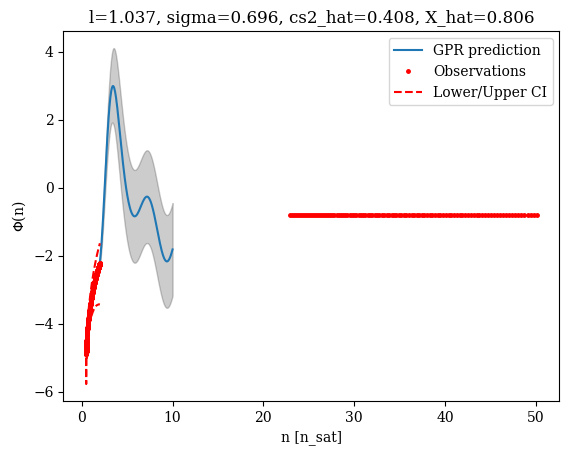

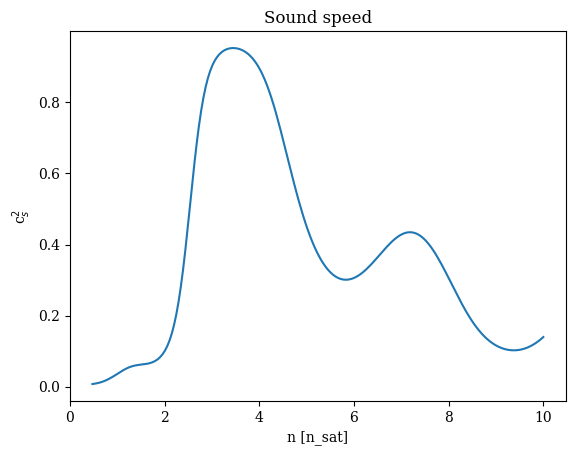

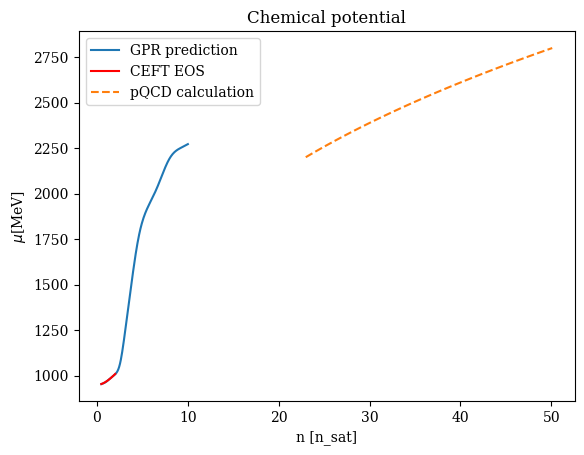

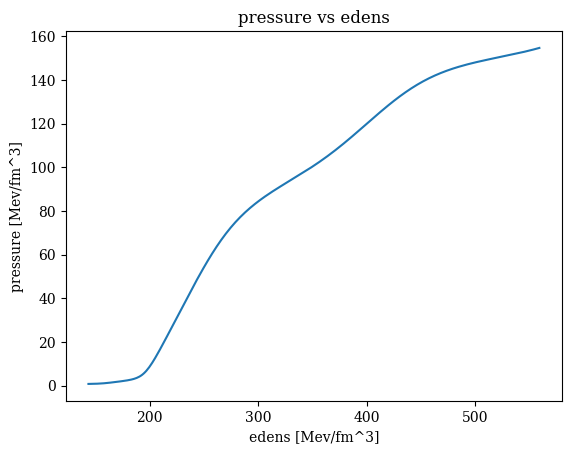

In [69]:
cs2_hat, nu_hat, l_hat, X_hat = hel.get_hype_samples()

kernel = db.Kernel('SE', sigma=nu_hat, l=l_hat)

n_pqcd, cs2_pqcd = hel.get_pqcd(X_hat, size=100)

x_train =  np.concatenate((n_ceft/0.16, n_pqcd)) #nsat
cs2_train =  np.concatenate((cs2_ceft_avg, cs2_pqcd))

phi_pqcd_sigma = np.zeros_like(cs2_pqcd)
phi_sigma_train = np.concatenate((phi_ceft_sigma, phi_pqcd_sigma))
phi_train = hel.get_phi(cs2_train)
train_noise = phi_sigma_train**2

x_test = np.linspace(x_train[0], 10, 200) # number density in nsat, starting val is ending val of n crust


gp = db.GP(kernel, hel.get_phi(cs2_hat))
gp.fit(x_train, x_test, phi_train, var_f = train_noise, stabilise=True)

phi_test, sig = gp.posterior()


plt.rcParams["font.family"] = "serif"

plt.plot(x_test, phi_test[0], label=f'GPR prediction')
plt.plot(x_train, phi_train, 'r.', markersize=5, label='Observations')
plt.fill_between(x_test.ravel(), phi_test[0] - 1.96 * sig, phi_test[0] + 1.96 * sig, alpha=0.2, color='k')
plt.xlabel('n [n_sat]')
plt.ylabel(r'$\Phi$(n)')
plt.title(f"l={l_hat:.3f}, sigma={nu_hat:.3f}, cs2_hat={cs2_hat:.3f}, X_hat={X_hat:.3f}")

plt.plot(n_ceft/0.16, phi_ceft_avg+phi_ceft_width/2, '--', color='red', label='Lower/Upper CI')
plt.plot(n_ceft/0.16, phi_ceft_avg-phi_ceft_width/2, '--', color='red')


plt.legend()
plt.show()


eos = db.EosProperties(x_test*0.16, phi_test, epsi_0 = e_ini, p_0 = p_ini, mu_0=mu_ini)
eos_prop_results = eos.get_all()


plt.plot(x_test, eos_prop_results['cs2'])
plt.xlabel('n [n_sat]')
plt.ylabel(r'c$_s^2$')
plt.title(f"Sound speed")
plt.show()

mu_grid = np.linspace(2.2,2.8,100) #Grid in chemical potential in [GeV]

plt.plot(x_test, eos_prop_results["mu"], label = "GPR prediction")
plt.plot(n_ceft/0.16, mu_ceft, "r", label="CEFT EOS")
plt.plot(n_pqcd, mu_grid*1000, "--", label = "pQCD calculation")

plt.title("Chemical potential")
plt.xlabel('n [n_sat]')
plt.ylabel(r'$\mu$[MeV]')
plt.legend()

#plt.xlim(0,2)
#plt.ylim(900,1300)

plt.show()

plt.plot(eos_prop_results["epsilon"], eos_prop_results["pressure"])
plt.xlabel(r"edens [Mev/fm^3]")
plt.ylabel(r'pressure [Mev/fm^3]')
plt.title("pressure vs edens")
plt.show()

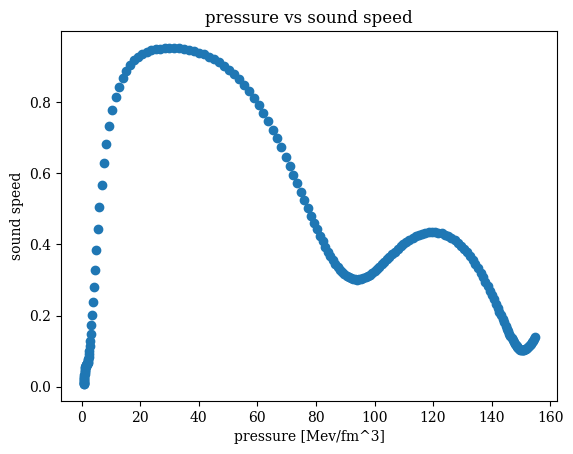

In [70]:
plt.scatter(eos_prop_results["pressure"], eos_prop_results["cs2"])
plt.xlabel(r"pressure [Mev/fm^3]")
plt.ylabel(r'sound speed')
plt.title("pressure vs sound speed")
plt.show()

# eos uncertainties

$$c_s^2 = \frac{1}{e^{-\phi}+1}$$ 
$$\sigma_{c_s^2} = |\frac{\partial {c_s^2}}{\partial \phi}| \sigma_{\phi} = \frac{e^{-\phi}}{(e^{-\phi}+1)^2}| \sigma_{\phi}$$

not needed as sampling

In [39]:
def cs2_uncertainty(phi, sig_phi):
    phi = phi.flatten()
    sig_cs2 = np.abs(np.exp(-phi)/((np.exp(-phi)+1)**2)) * sig_phi
    return sig_cs2

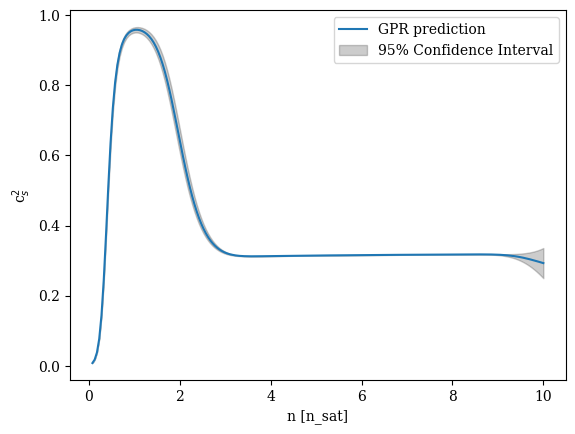

In [40]:
sig_cs2 = cs2_uncertainty(phi_test, sig)
plt.plot(x_test, eos_prop_results['cs2'], label='GPR prediction')
plt.fill_between(x_test, eos_prop_results['cs2'] - 1.96 * sig_cs2, eos_prop_results['cs2'] + 1.96 * sig_cs2, alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('n [n_sat]')
plt.ylabel(r'c$_s^2$')
plt.legend()

plt.show()

In [16]:
def mu_uncertainty(mu, mu0, sig_mu0, sig_cs2, n, n_init):
    """
    Calculate the uncertainty in mu (sigma_mu).

    Parameters:
    - mu: Array of mu values.
    - sig_cs2: Array of uncertainties in c_i^2 (sigma_c_i).
    - x_test: Array of n_i values.
    - delta_n: Array of Delta n_i values corresponding to each n_i.

    Returns:
    - sigma_mu: Array of uncertainties in mu (sigma_mu).

    See notebook on uncertainty
    """
    # Ensure all inputs are numpy arrays for efficient calculations
    mu = np.array(mu)
    sig_cs2 = np.array(sig_cs2)
    n = np.array(n)
    delta_n = np.diff(n, prepend=n_init)

    uncertainty_terms = (delta_n / n) * sig_cs2

    sigma_x2 = np.sum(uncertainty_terms**2)
    
    # Compute sigma_mu using the propagated uncertainty formula
    sigma_mu = ((mu*sigma_x2)+(sig_mu0 * mu/mu0))**0.5
    
    return sigma_mu


In [17]:
sig_mu = mu_uncertainty(eos_prop_results['mu'], mu_ini, mu_ini_sigma, sig_cs2, x_test, n_ini)

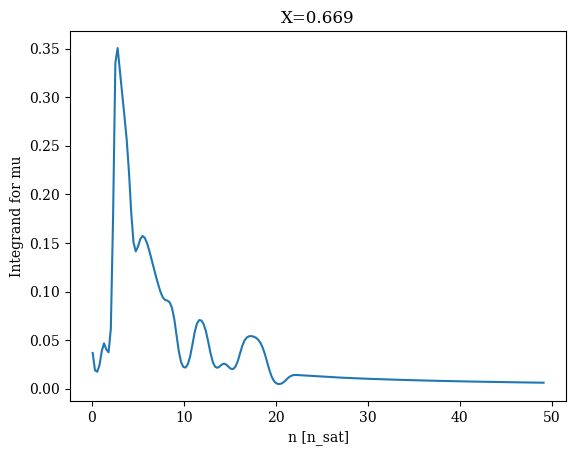

In [46]:
plt.plot(x_test, eos_prop_results['cs2']/x_test)
plt.xlabel('n [n_sat]')
plt.ylabel(r'Integrand for mu')
plt.title(f"X={X_hat:.3f}")
plt.show()

In [53]:
def epsilon_uncertainty(epsilon, sigma_epsilon0, sigma_mu, n, n_init):
    n = np.array(n)
    delta_n = np.diff(n, prepend=n_init)

    cumulative_uncertainty_squared = 0.0
    sigma_epsilon = np.zeros(len(epsilon))

    for i in range(len(epsilon)):
        cumulative_uncertainty_squared += (sigma_mu[i] * delta_n[i])**2
        sigma_epsilon[i] = np.sqrt(sigma_epsilon0**2 + cumulative_uncertainty_squared)

    return sigma_epsilon

In [54]:
sig_epsilon = epsilon_uncertainty(eos_prop_results['epsilon'], e_ini, sig_mu, x_test, n_ini)

In [55]:
def sigma_cov(x,y):
    n = len(x)
    sig = 1/n * np.sum((x-np.mean(x))*(y-np.mean(y)))
    return sig

In [56]:
sigma_cov(eos_prop_results["cs2"], eos_prop_results["mu"])

-6.525684784661569

In [57]:
from scipy.integrate import cumulative_simpson as cumsimp

def p_uncertainty(p0, sigma_p0, p, epsilon, epsilon_0, mu, mu_0, sigma_mu, cs2, sigma_cs2, n):
    """
    Calculate the propagated uncertainty in p = p0 + integral(cs2 * mu dn).

    Parameters:
    - p0: Initial value of p.
    - sigma_p0: Uncertainty in p0.
    - p: Array of precomputed p values.
    - epsilon: Array of cumulative integral values for mu (epsilon).
    - epsilon_0: Initial value of epsilon (epsilon_0).
    - mu: Array of mu values.
    - mu_0: Initial value of mu.
    - sigma_mu: Array of uncertainties in mu.
    - cs2: Array of cs2 values.
    - sigma_cs2: Array of uncertainties in cs2.
    - n: Array of n values (integration variable).

    Returns:
    - sigma_p: Uncertainty in p.
    """
    # Calculate integrals from the given data
    integral_cs2_mu = p - p0  # Integral of cs2 * mu (already computed as p - p0)
    integral_mu = epsilon - epsilon_0  # Integral of mu (from epsilon)
    integral_cs2 = cumsimp(y=cs2, x=n, initial=np.log(mu_0))  # Integral of cs2

    # Partial derivatives
    partial_mu = integral_cs2  # ∂p/∂mu = ∫cs2 dn
    partial_cs2 = integral_mu  # ∂p/∂cs2 = ∫mu dn

    sigma_cs2_mu = sigma_cov(cs2, mu)

    # Propagate uncertainty
    sigma_p_squared = (
        sigma_p0**2 +                               # Contribution from p0
        (partial_mu**2) * sigma_mu**2 +             # Contribution from mu
        (partial_cs2**2) * sigma_cs2**2 +           # Contribution from cs2 <- largest
        2 * np.abs(partial_mu * partial_cs2) * (sigma_mu*sigma_cs2) # Covariance term, note it is the upper bound
    )
    sigma_p = np.sqrt(sigma_p_squared)

    return sigma_p


In [58]:
sig_p = p_uncertainty(p_ini, 
                      p_ini_sigma, 
                      eos_prop_results["pressure2"], 
                      eos_prop_results["epsilon"], 
                      e_ini, 
                      eos_prop_results["mu"], 
                      mu_ini, 
                      mu_ini_sigma, 
                      eos_prop_results["cs2"], 
                      sig_cs2, 
                      x_test)

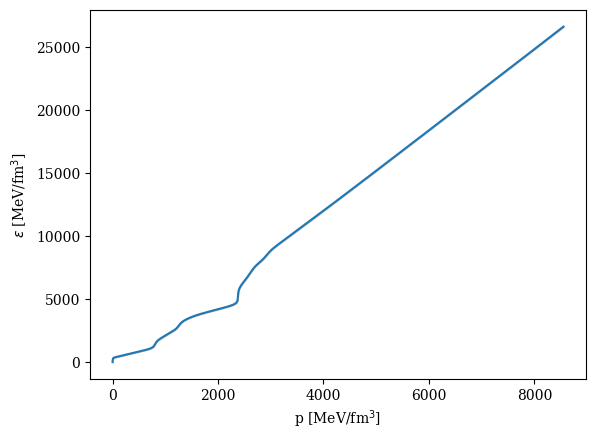

In [59]:
plt.plot( eos_prop_results["pressure2"], eos_prop_results["epsilon"],)
plt.ylabel(r'$\epsilon$ [MeV/fm$^3$]')
plt.xlabel(r'p [MeV/fm$^3$]')

plt.fill_between(eos_prop_results["pressure2"], eos_prop_results['epsilon'] - 1.96 * sig_epsilon, eos_prop_results['epsilon'] + 1.96 * sig_epsilon, alpha=0.2, color='k', label='95% Confidence Interval')

plt.show()    

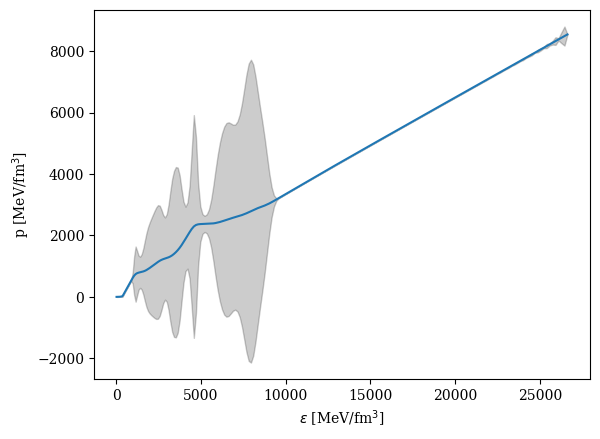

In [60]:
plt.plot(eos_prop_results["epsilon"], eos_prop_results["pressure2"])
plt.xlabel(r'$\epsilon$ [MeV/fm$^3$]')
plt.ylabel(r'p [MeV/fm$^3$]')

plt.fill_between(eos_prop_results["epsilon"], eos_prop_results['pressure2'] - 1.96 * sig_p, eos_prop_results['pressure2'] + 1.96 * sig_p, alpha=0.2, color='k', label='95% Confidence Interval')

plt.show()    